# Decision Tree Regression

In [1]:
# from google.colab import files
# up = files.upload()

## import dataset

In [2]:
import pandas as pd
df = pd.read_csv('dataset.csv')
df.head(3)

,A,B,C,T
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136


In [3]:
df = df[['A', 'T']]
df.head(3)

,A,T
0,2.0,196
1,2.4,221
2,1.5,136


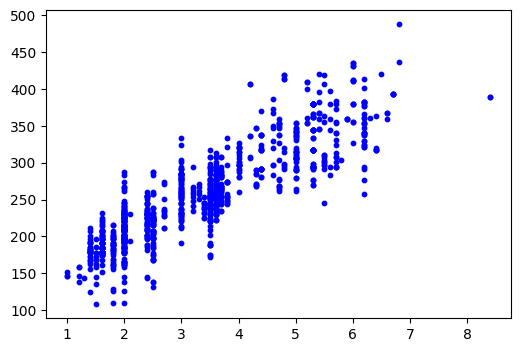

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(df[['A']], df['T'], s=10, c='b')
plt.show()

## cleaning

In [5]:
# clean the data

## encoding

In [6]:
# encode the data

## define x , y

In [7]:
import numpy as np
x = df[['A']].values
y = df['T'].values

## spliting

In [8]:
### finding best random state 

# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import r2_score

# import time
# t1 = time.time()
# lst = []
# for i in range(1,10):
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
#     dtr = DecisionTreeRegressor()
#     dtr.fit(x,y)
#     yhat_test = dtr.predict(x_test)
#     r2 = r2_score(y_test, yhat_test)
#     lst.append(r2)
# t2 = time.time()
# print(f"run time: {round((t2 - t1)/60, 2)} min")
# print(f"r2_score: {round(max(lst), 2)}")
# rs = np.argmax(lst) + 1
# print(f"random_state: {rs}")

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [10]:
y_train[:5]

array([258, 212, 317, 308, 301])

## scaling

In [11]:
# Decision Tree Regression doesn't need scaling

## train the model

In [12]:
### K-fold cross validation

# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import GridSearchCV

# parameters = {
#     '': [],
#     '': []
# }

# dt = DecisionTreeRegressor(random_state=1)
# gs = GridSearchCV(estimator=dt, param_grid=parameters, cv=5)

# gs.fit(x_train, y_train)

# best_params = gs.best_params_
# print(best_params)

In [13]:
# def param
# criterion='squared_error', splitter='best', max_depth=None
# min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0
# max_features=None, random_state=None, max_leaf_nodes=None
# min_impurity_decrease=0.0, ccp_alpha=0.0, monotonic_cst=None

In [14]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

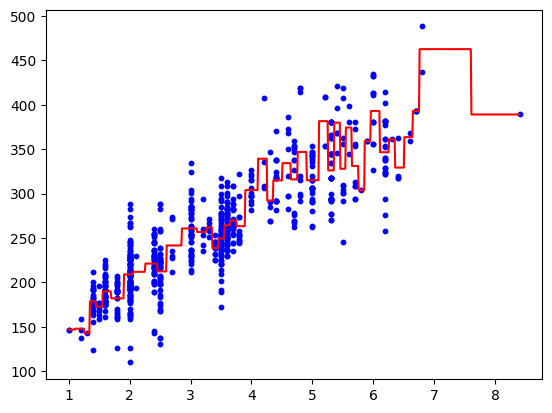

In [15]:
plt.scatter(x_train, y_train, color='b', s=10)
xx = np.arange(np.min(x_train), np.max(x_train), 0.01).reshape(-1, 1)
plt.plot(xx, dtr.predict(xx), color='r')
plt.show()

## predict test data

In [16]:
yhat_test = dtr.predict(x_test)

## evaluate the model

In [17]:
from sklearn.metrics import r2_score
print("r2-score (train data): %0.4f" % r2_score(y_train, dtr.predict(x_train)))
print("r2-score (test data): %0.4f" % r2_score(y_test, yhat_test))

r2-score (train data): 0.8176
r2-score (test data): 0.8075


In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(f"MSE (train data): {mean_squared_error(y_train, dtr.predict(x_train))}")
print(f"MAE (train data): {mean_absolute_error(y_train, dtr.predict(x_train))}")
print(f"MSE (test data): {mean_squared_error(y_test, yhat_test)}")
print(f"MAE (test data): {mean_absolute_error(y_test, yhat_test)}")

MSE (train data): 723.4422132010718
MAE (train data): 20.533924544900202
MSE (test data): 798.4732305024548
MAE (test data): 20.992326840780198


## predict new data

In [19]:
dtr.predict([[5.5]])

array([327.90909091])

## save the model

In [20]:
# import joblib
# joblib.dump(dtr, 'dtr_model.pkl')

## load the model

In [21]:
# import joblib
# dtr = joblib.load('dtr_model.pkl')